## **Image Segmentation using YOLOv8**
#### *By: Raghad Salem*

in this notebook i'm applying pretrained YOLOv3 for image segmentation , the modl already has sepcific classes can recognize

## Install YOLOv8

In [14]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [6]:
!pip install ultralytics==8.0.28

## Connect Drive

In [7]:
from google.colab import drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Packages

In [8]:
import os
import re
import sys
import time
import json
import yaml
import requests
import math
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageChops

import ultralytics
from ultralytics import YOLO

In [9]:
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [28]:
#function to help plot image
def plot_imgs(imgs, titles=None, n_rows=1, fig_width=5,
              fig_height=10, title_size=12, title_color='black'):
  # Define a figure and its size
  figure = plt.figure(figsize=(fig_width, fig_height))

  # Loop over the number of images
  for i in range(len(imgs)):
    plt.subplot(n_rows, len(imgs) // n_rows, i+1)    # Create a subplot

    # Convert the colors of the images
    # Matplot reads CV2 RGB images as BGR for some reason
    if len(imgs[i].shape) == 3:
      img_matplot = cv2.cvtColor(imgs[i], cv2.COLOR_RGB2BGR)
      plt.imshow(img_matplot)
    else:
      img_matplot = imgs[i]
      plt.imshow(img_matplot, cmap="gray")

    # If there are titles, show them
    if titles:
        plt.title(titles[i], size=title_size, color=title_color)

    # Remove the X and Y ticks
    plt.xticks([])
    plt.yticks([])

In [30]:
#function to plot the segmented image
def plot_yolo_results(img, results):
    # Get a list of all the class names
    NAMES = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella","handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat","baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup","fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli","carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed","diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone","microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors","teddy bear", "hair drier", "toothbrush" ]

    # Fetch the results
    result = results[0]

    # Make a copy of the original image
    img_out = img.copy()

    # Get the bounding boxes and labels from the result
    bbox_xyxys = result.boxes.xyxy.cpu()
    confidences = result.boxes.conf
    labels = result.boxes.cls

    # Loop over the results
    for (bbox_xyxy, confidence, cls) in zip(bbox_xyxys, confidences, labels):
        # Extract the bounding boxes
        bbox = np.array(bbox_xyxy)
        x1, y1, x2, y2 = bbox[0], bbox[1], bbox[2], bbox[3]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Extract the class names and labels
        classname = int(cls)
        class_name = NAMES[classname]
        conf = math.ceil((confidence*100))/100
        label = f'{class_name}{conf}'

        # Set text size for labels
        t_size = cv2.getTextSize(label, 0, fontScale = 1, thickness=2)[0]
        c2 = x1 + t_size[0], y1 - t_size[1] - 3

        # Draw bounding boxes
        cv2.rectangle(img_out, (x1, y1), c2, (100, 185, 20), -1, cv2.LINE_AA)

        # Draw text
        cv2.putText(img_out, label, (x1, y1-2), 0, 1, (255, 255, 255), thickness=2, lineType=cv2.LINE_AA)

        # Draw rectangle over the text
        cv2.rectangle(img_out, (x1, y1), (x2, y2), (100, 185, 20), 3)

    plot_imgs([img_out], [f'YOLOv8s Segmentation Output'], fig_width=10, fig_height=10)

# **use Pre-trained COCO Model**

## **Download Model**

In [31]:
model = YOLO(f'{HOME}/yolov8l-seg.pt')

## **Run the model on images**

## Using Local Image


0: 384x640 1 chair, 1 potted plant, 1 bed, 1 book, 1 vase, 50.8ms
Speed: 0.6ms pre-process, 50.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 448x640 1 person, 1 bench, 1 cat, 2 dogs, 1 book, 61.0ms
Speed: 0.5ms pre-process, 61.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 448x640 3 bananas, 9 apples, 4 oranges, 59.8ms
Speed: 0.5ms pre-process, 59.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x448 2 cups, 2 forks, 1 spoon, 1 bowl, 2 cakes, 1 dining table, 53.8ms
Speed: 0.5ms pre-process, 53.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 fork, 1 knife, 2 spoons, 1 cake, 69.6ms
Speed: 0.7ms pre-process, 69.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


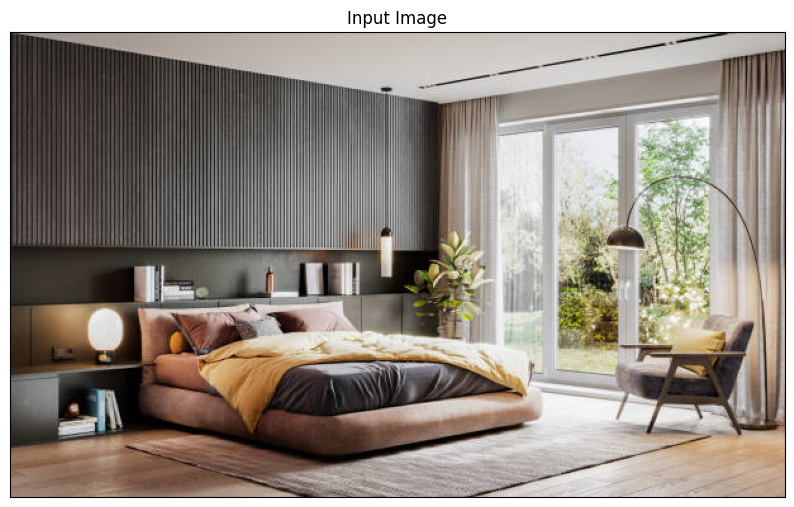

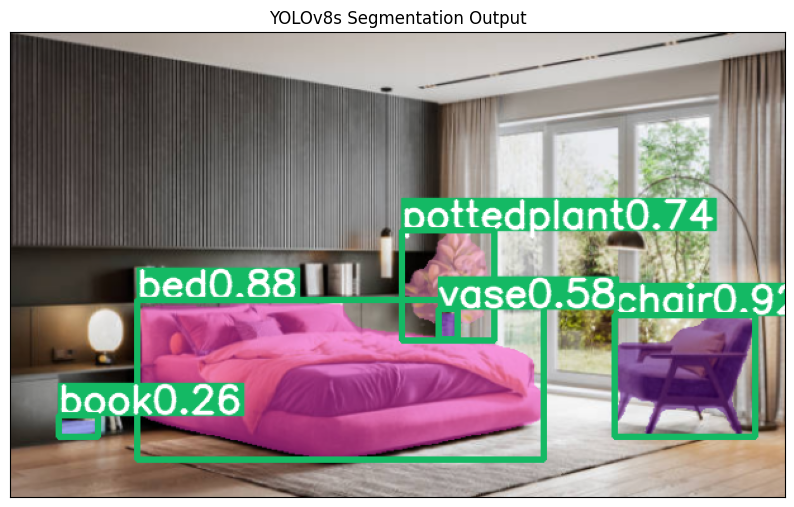

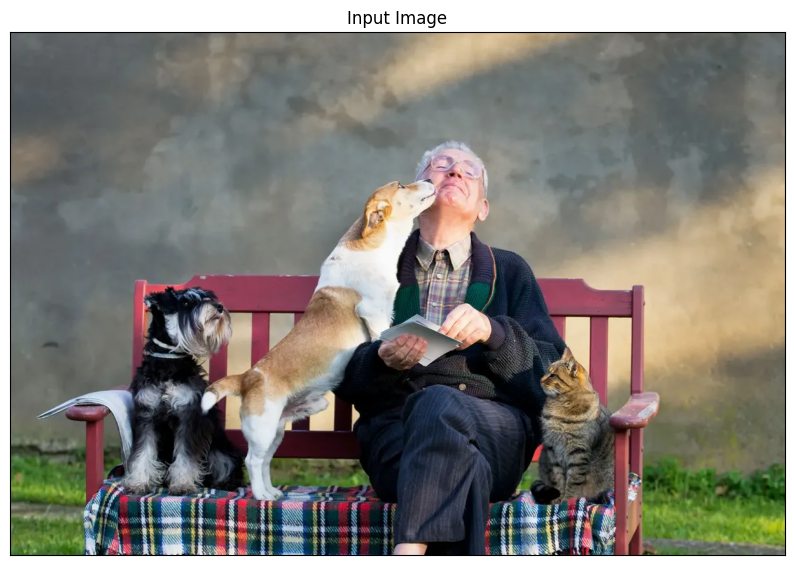

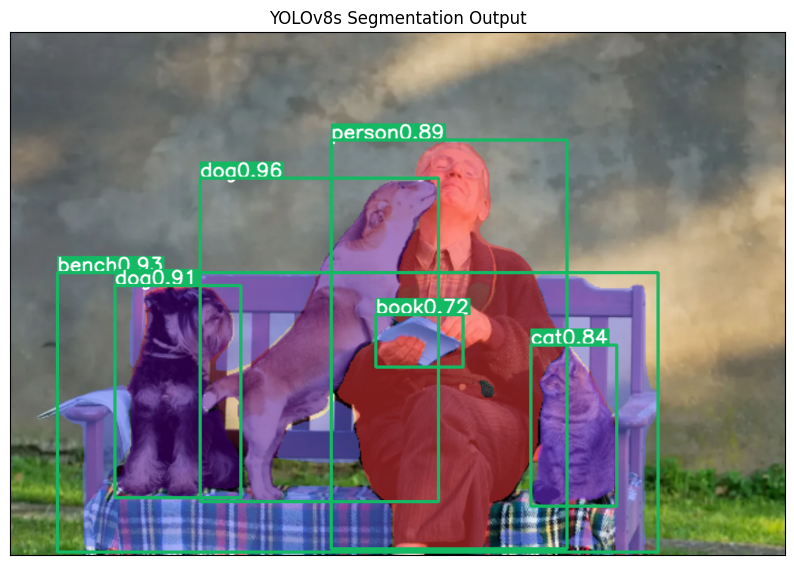

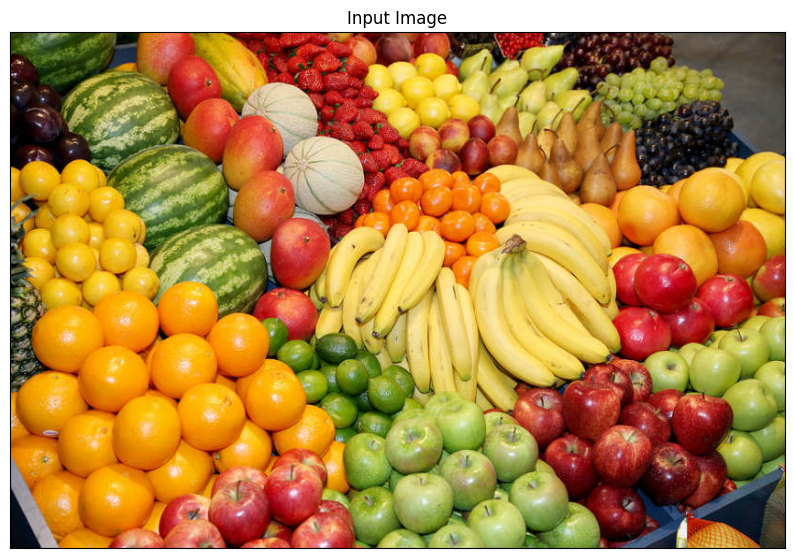

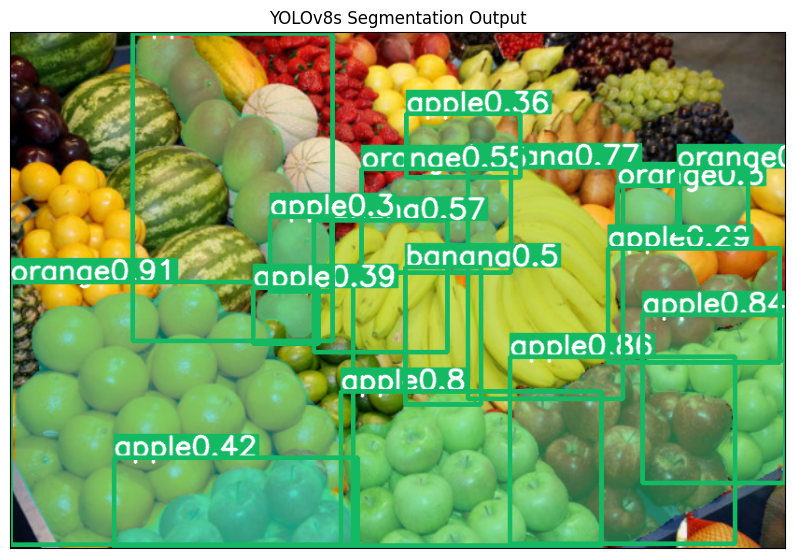

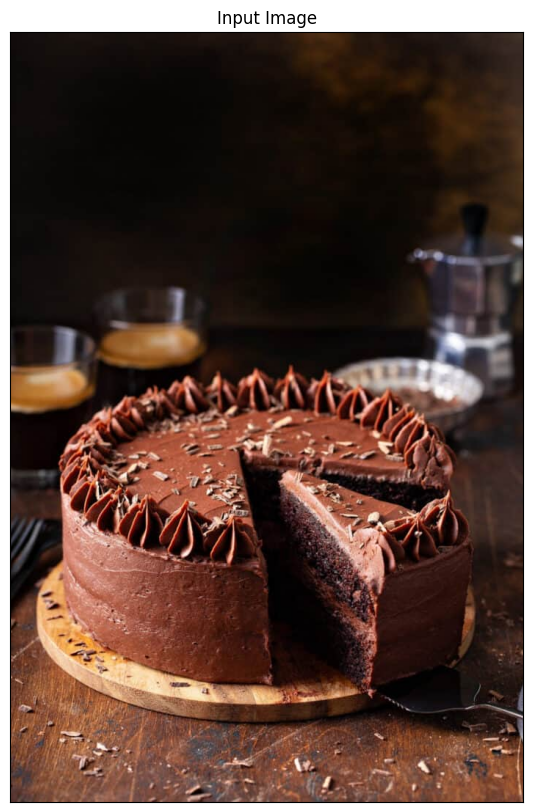

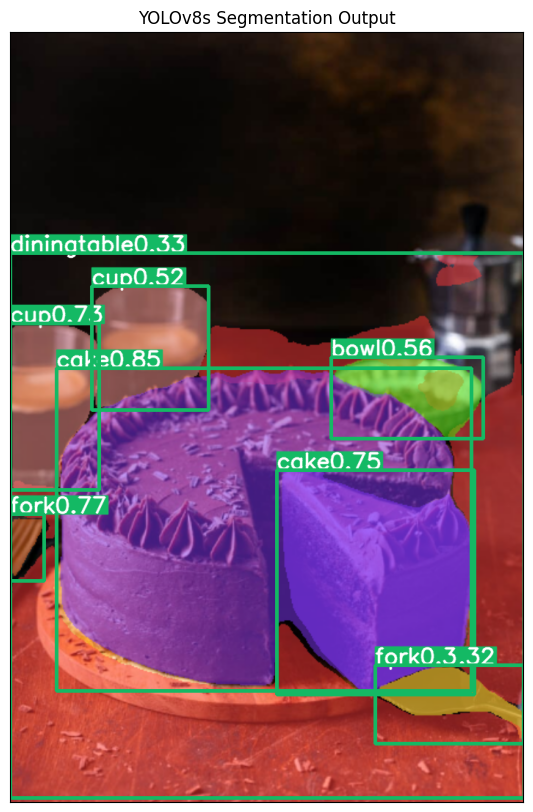

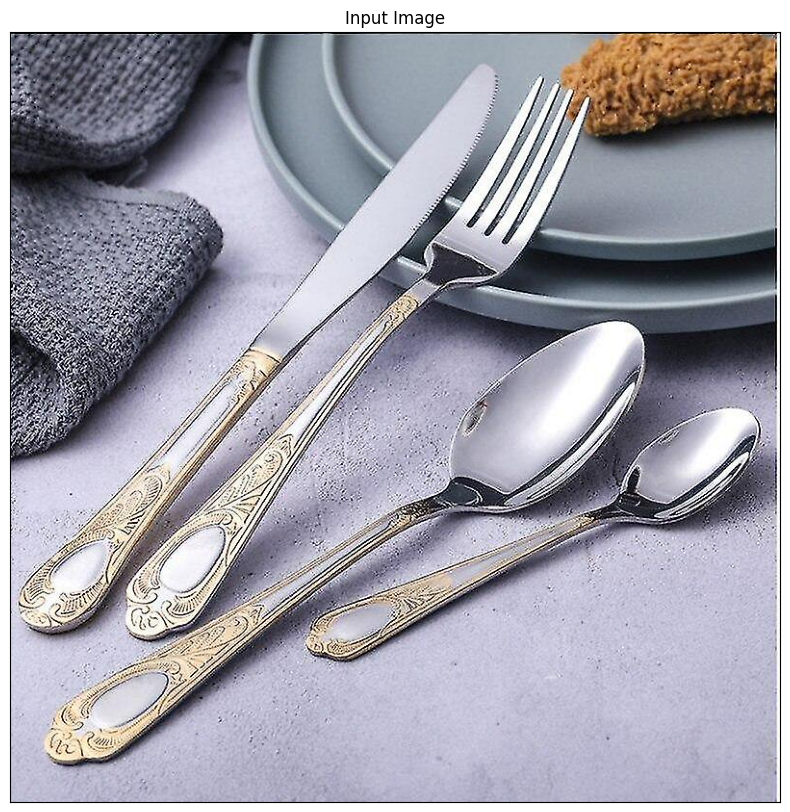

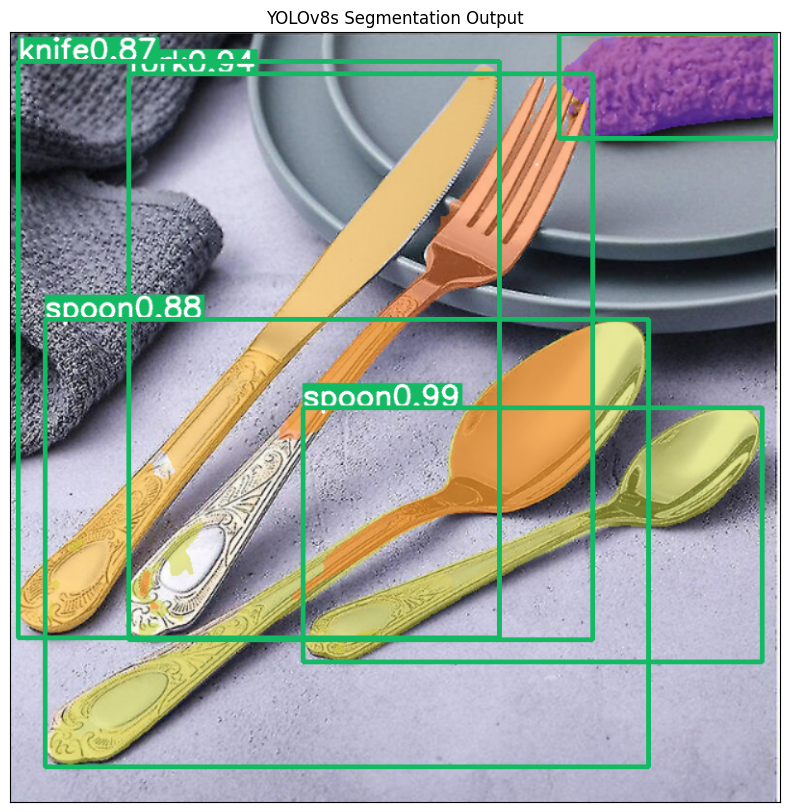

In [67]:
# Define the image path [TO BE REPLACED WITH YOUR OWN IMAGE PATH]
paths=['/content/drive/MyDrive/Colab Notebooks/image-segmentation/forniture.jpg',
       '/content/drive/MyDrive/Colab Notebooks/image-segmentation/person-dog-cat.jpg',
      '/content/drive/MyDrive/Colab Notebooks/image-segmentation/fruits.jpg',
       '/content/drive/MyDrive/Colab Notebooks/image-segmentation/cake.jpg',
      '/content/drive/MyDrive/Colab Notebooks/image-segmentation/fork-spoon-knife.jpg']

for path in paths:
  IMG_PATH = path

  # Read the image
  input_img = cv2.imread(IMG_PATH)

  # Plot the input image
  plot_imgs([input_img], ['Input Image'], fig_width=10, fig_height=10)

  # Run model on local image
  # Note that now we feed the model the image itself, not a URL
  img = input_img.copy()
  results = model.predict(source=img, conf=0.25)

  plot_yolo_results(img, results)